In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_root = '/content/drive/My Drive/dataset1'

In [15]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization
from keras import backend as K 
import numpy as np
from keras.optimizers import *
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
img_width, img_height = 150, 150
  
train_data_dir = '/content/drive/My Drive/dataset1/train'
validation_data_dir = '/content/drive/My Drive/dataset1/test'
train_samples = 1000
validation_samples = 660
epochs = 20
batch_size = 10
filter_pixel=3


In [17]:
from keras import backend as K 
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [18]:
train_datagen = ImageDataGenerator( 
                rotation_range=20.,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='categorical') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='categorical')

Found 2640 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), padding="same",
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(3,use_bias=False)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.25))      

model.add(Dense(3)) 
model.add(Activation('softmax')) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  app.launch_new_instance()


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 64)       

In [21]:
opt = Adam(lr=0.03)
model.compile(optimizer=opt, loss='categorical_crossentropy',
                   metrics=['categorical_accuracy'])

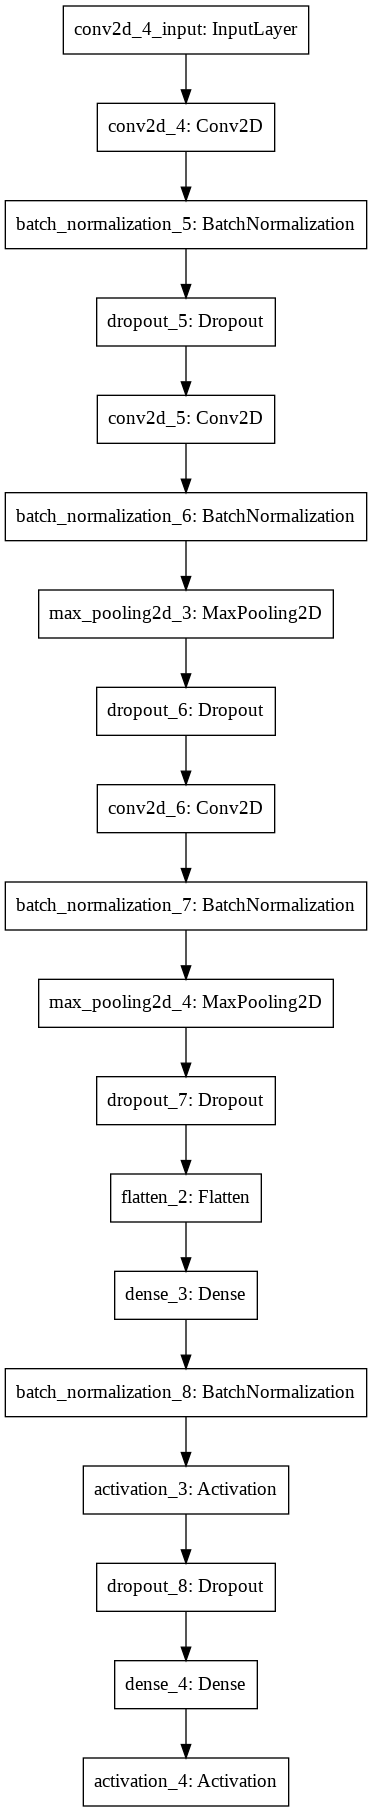

In [22]:
from keras.utils import plot_model
plot_model(model,to_file='model.png')

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = './model.h5'
callbacks = [
    EarlyStopping(
        monitor='val_acc', 
        patience=10,
        mode='max',
        verbose=1),
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]

In [24]:
history=  model.fit_generator(train_generator, 
    steps_per_epoch = train_samples, 
    epochs = 20, 
    validation_data = validation_generator,
    validation_steps = 50,
    callbacks=callbacks)

Epoch 1/20
1000/1000 [==============================] - 135s 135ms/step - loss: 0.9070 - categorical_accuracy: 0.5540 - val_loss: 1.1910 - val_categorical_accuracy: 0.3140
Epoch 2/20
   1/1000 [..............................] - ETA: 2:08 - loss: 0.5794 - categorical_accuracy: 0.7000

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_categorical_accuracy,loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1000/1000 [==============================] - 133s 133ms/step - loss: 0.7722 - categorical_accuracy: 0.6465 - val_loss: 1.7115 - val_categorical_accuracy: 0.3100
Epoch 3/20
1000/1000 [==============================] - 133s 133ms/step - loss: 0.7349 - categorical_accuracy: 0.6706 - val_loss: 2.8608 - val_categorical_accuracy: 0.3760
Epoch 4/20
1000/1000 [==============================] - 133s 133ms/step - loss: 0.7163 - categorical_accuracy: 0.6896 - val_loss: 1.2721 - val_categorical_accuracy: 0.3180
Epoch 5/20
1000/1000 [==============================] - 133s 133ms/step - loss: 0.6845 - categorical_accuracy: 0.6992 - val_loss: 3.6521 - val_categorical_accuracy: 0.3260
Epoch 6/20
1000/1000 [==============================] - 134s 134ms/step - loss: 0.6606 - categorical_accuracy: 0.7221 - val_loss: 4.1989 - val_categorical_accuracy: 0.3780
Epoch 7/20
1000/1000 [==============================] - 133s 133ms/step - loss: 0.6429 - categorical_accuracy: 0.7253 - val_loss: 1.1163 - val_categori

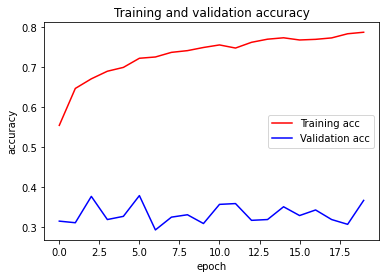

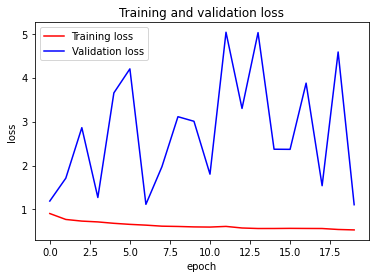

In [25]:
import matplotlib.pyplot as plt 
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()